In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
with open("feature_importance_ipynb_results.pkl", 'rb') as output:
    results = pickle.load(output)

In [3]:
experiments = list(set(exp[0] for exp in results.keys()))
categories = sorted(list(set(exp[1] for exp in results.keys())))
a_s = sorted(list(set(exp[2] for exp in results.keys())))

$$ y = a_1 \cdot x_1 + a_2 \cdot I(x_2 \in LEFT\_GROUP) + \sigma $$

$$ x1 - N(0,1) $$

In [4]:
fi_to_location = {'gain' :0, 'permutation_train': 1, 'permutation_test':2 ,'shap':3}

In [5]:
def plot_feature_importance(method, a1):
    df = pd.DataFrame()
    for exp in experiments:
        for cat in categories:
            try:
                df.loc[exp,cat] = results[(exp,cat, a1)][fi_to_location[method]]
            except IndexError:
                continue

    plt.rcParams['figure.figsize'] = [20, 10]
    df = 1-df
    ax = df.T.plot()
    ax.set_xlabel("Number of categories")
    ax.set_ylabel("Feature importance of the category vaector")
    ax.set_title(F"{method} Feature importance  of the category vaector with K categories as a function of K")
    plt.legend(loc='upper right')
    plt.show()
    

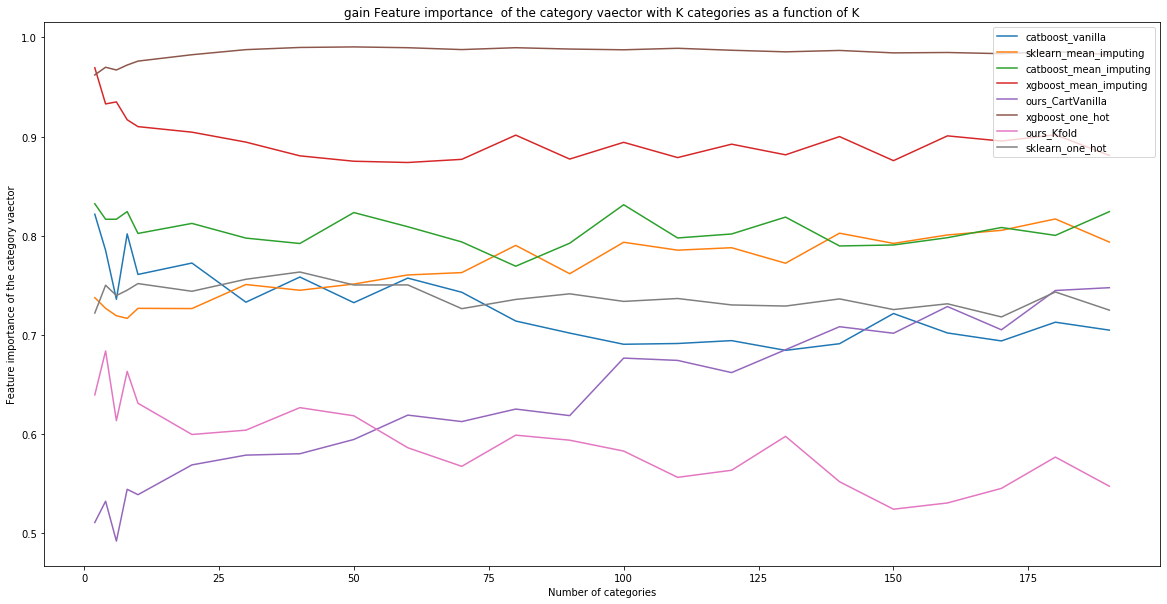

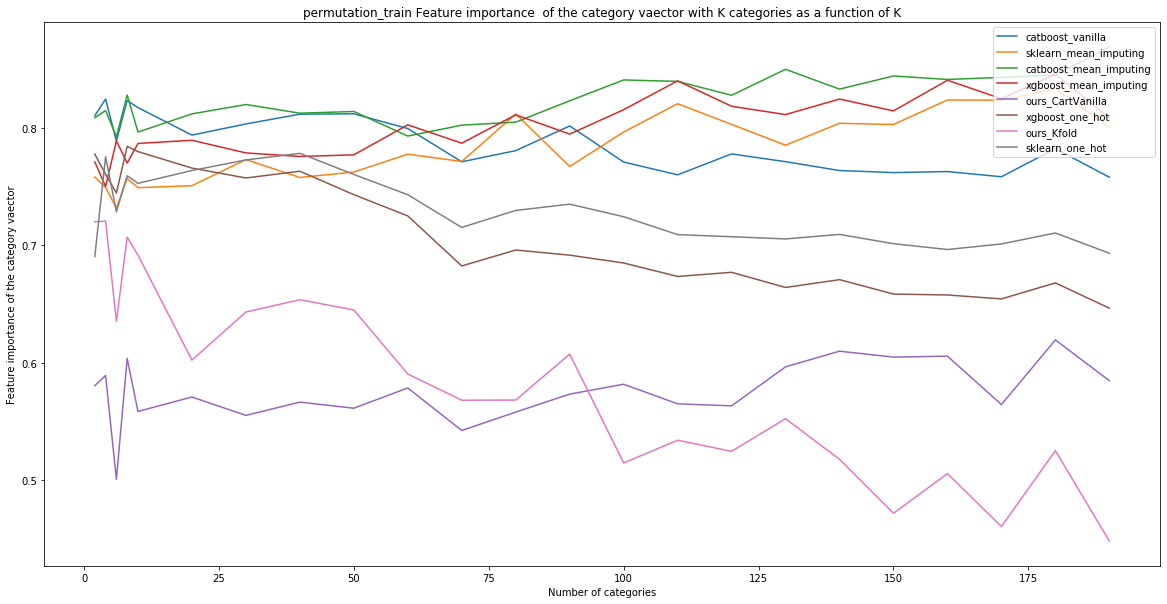

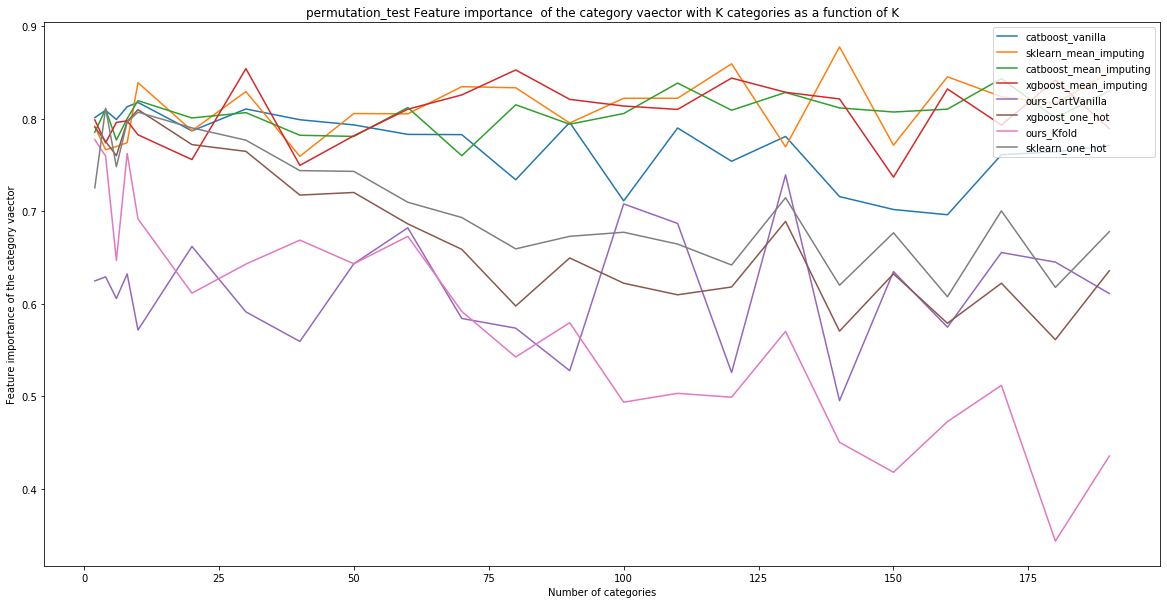

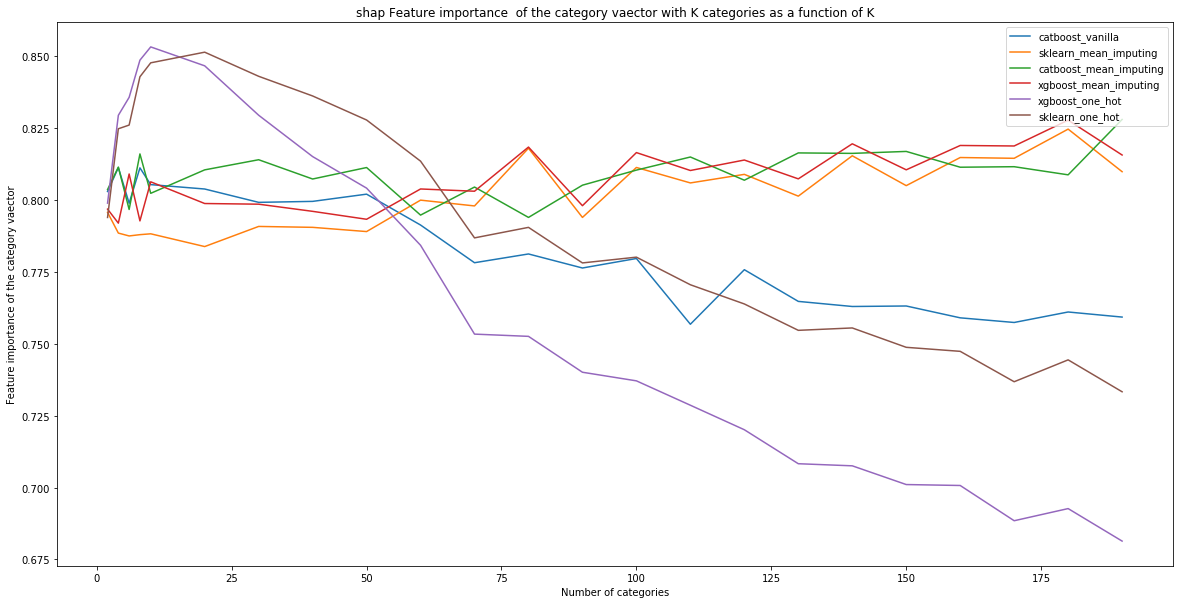

In [6]:
fi = 'gain'
a1 = 2 # [2, 10, 50, 100, 200]
plot_feature_importance(fi, a1)

fi = 'permutation_train'
a1 = 2 # [2, 10, 50, 100, 200]
plot_feature_importance(fi, a1)

fi = 'permutation_test'
a1 = 2 # [2, 10, 50, 100, 200]
plot_feature_importance(fi, a1)

fi = 'shap'
a1 = 2 # [2, 10, 50, 100, 200]
plot_feature_importance(fi, a1)

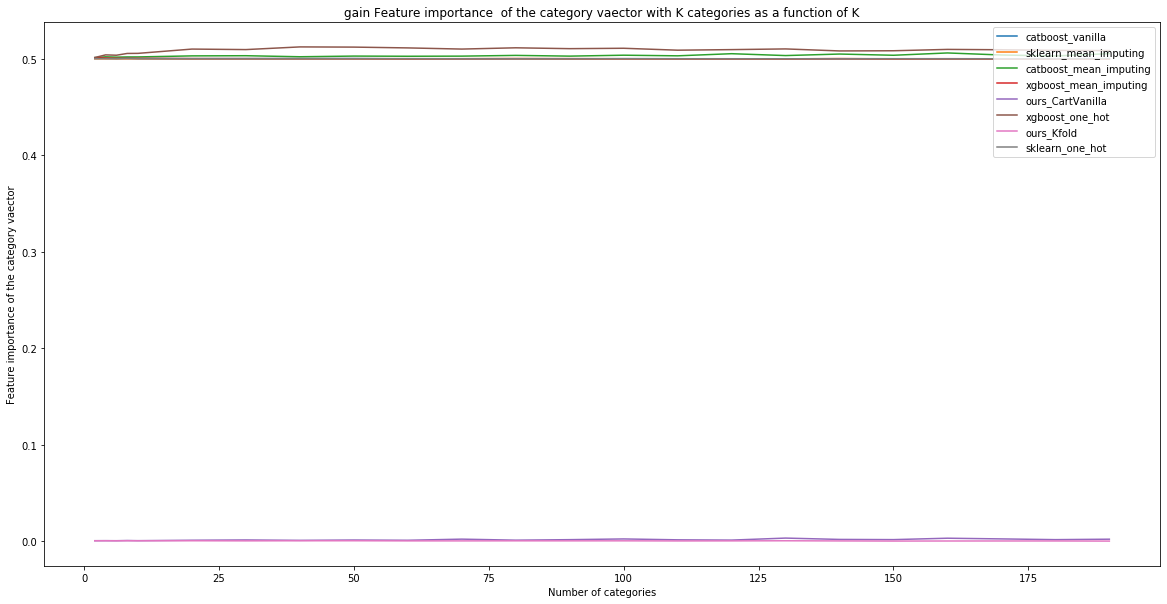

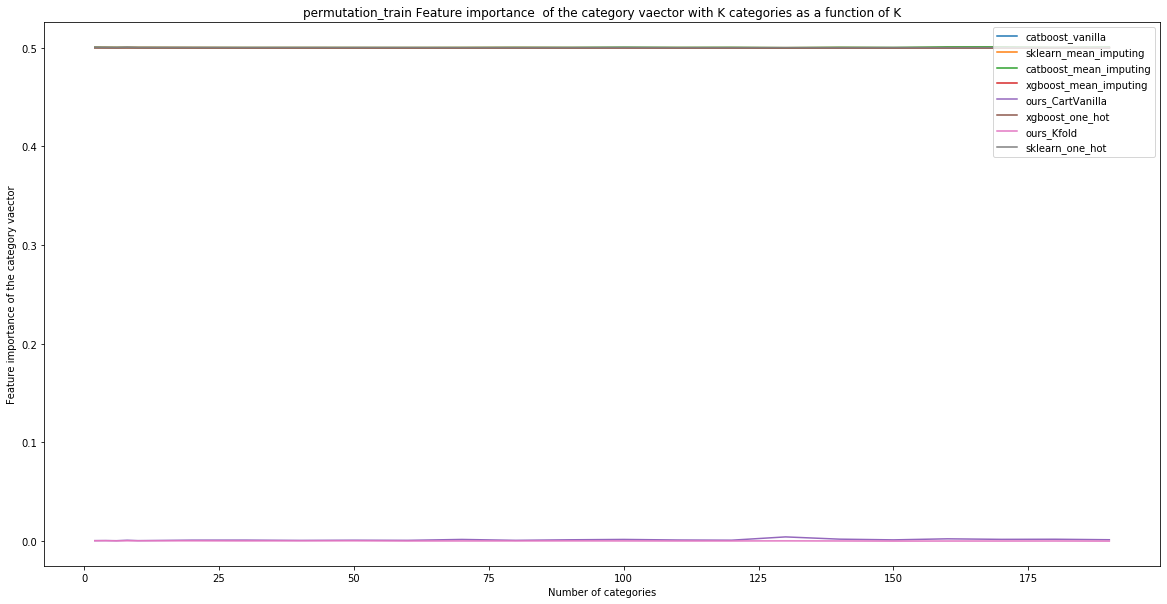

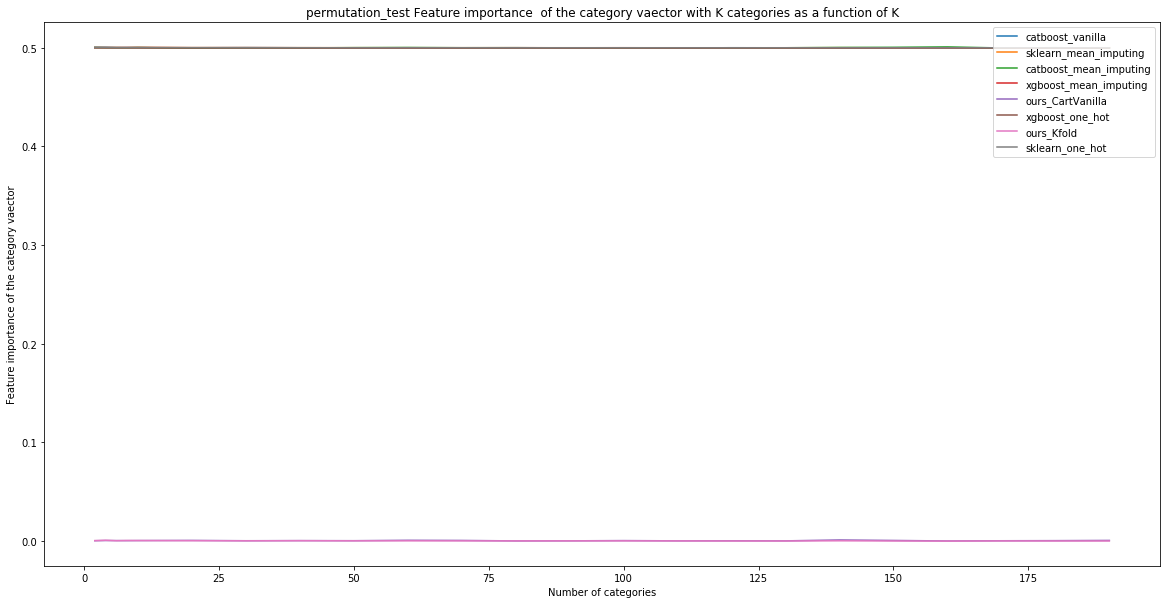

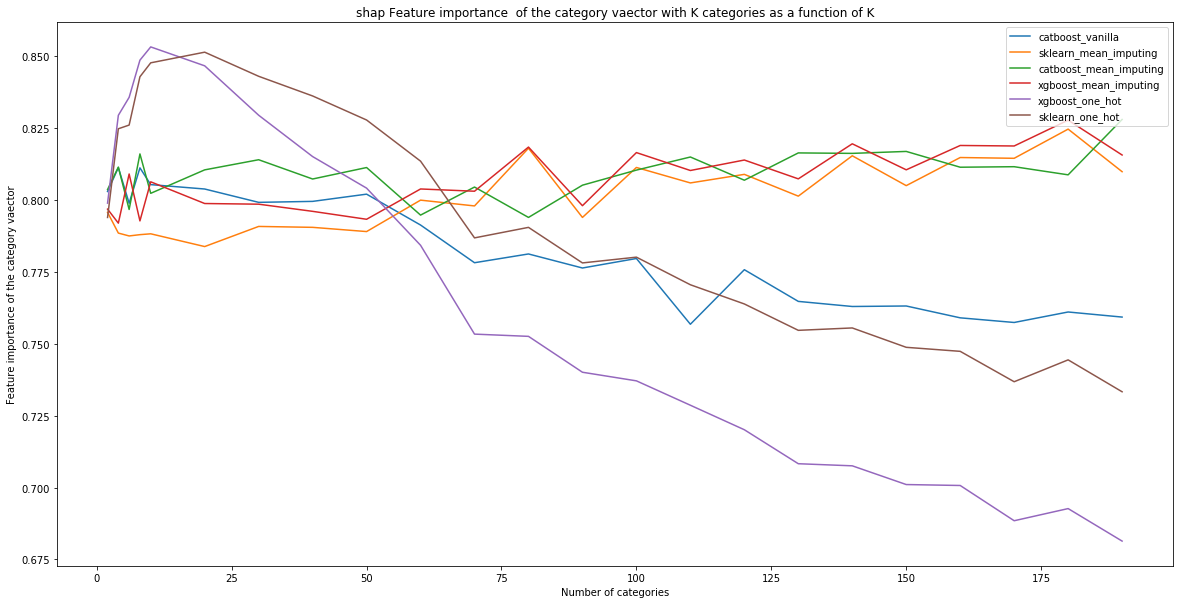

In [12]:
fi = 'gain'
a1 = 100 # [2, 10, 50, 100, 200]
plot_feature_importance(fi, a1)

fi = 'permutation_train'
a1 = 100 # [2, 10, 50, 100, 200]
plot_feature_importance(fi, a1)

fi = 'permutation_test'
a1 = 100 # [2, 10, 50, 100, 200]
plot_feature_importance(fi, a1)

fi = 'shap'
a1 = 2 # [2, 10, 50, 100, 200]
plot_feature_importance(fi, a1)

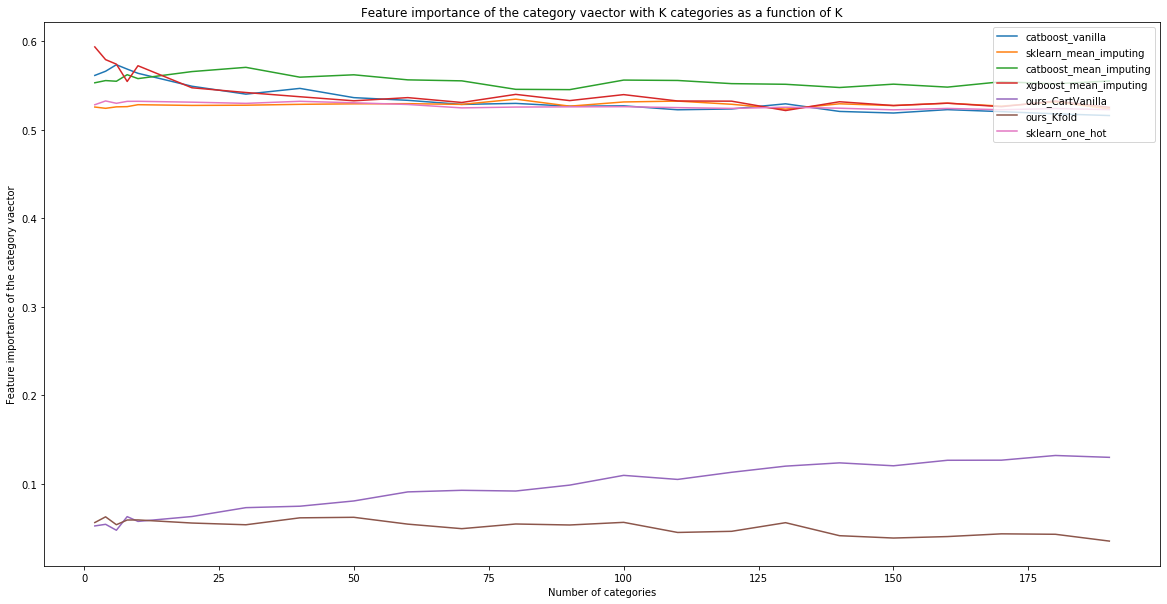

In [8]:
method = 'gain'
a1 = 10 # [2, 10, 50, 100, 200]
df = pd.DataFrame()
for exp in experiments:
    for cat in categories:   
        df.loc[exp,cat] = results[(exp,cat, a1)][fi_to_location[method]]

plt.rcParams['figure.figsize'] = [20, 10]
df = 1-df
df = df[~df.index.isin(['xgboost_one_hot'])]
ax = df.T.plot()
ax.set_xlabel("Number of categories")
ax.set_ylabel("Feature importance of the category vector")
ax.set_title("Feature importance of the category vector with K categories as a function of K")
plt.legend(loc='upper right')
plt.show()